In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

df_model = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

df_model['Gender'] = LabelEncoder().fit_transform(df_model['Gender'])
df_model = pd.get_dummies(df_model, columns=['Geography'], drop_first=True)

In [ ]:
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)

print("Model1: Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n",classification_report(y_test, y_pred1))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred1))

Model1: Logistic Regression:
Accuracy: 0.8115
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1544   63]
 [ 314   79]]


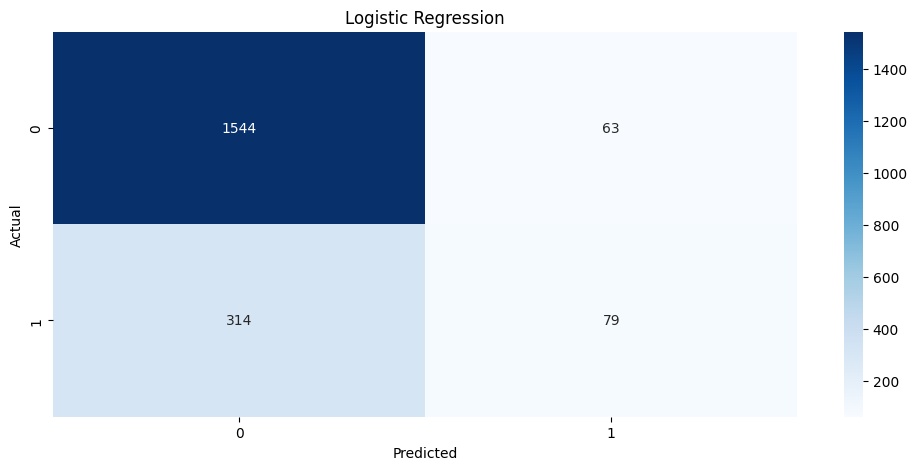

In [ ]:
fig,ax = plt.subplots(1,figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='d', cmap='Blues',ax=ax)
ax.set_title('Logistic Regression')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)

print("Model2: Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n",classification_report(y_test, y_pred2))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred2))

Model2: Random Forest:
Accuracy: 0.866
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:
 [[1552   55]
 [ 213  180]]


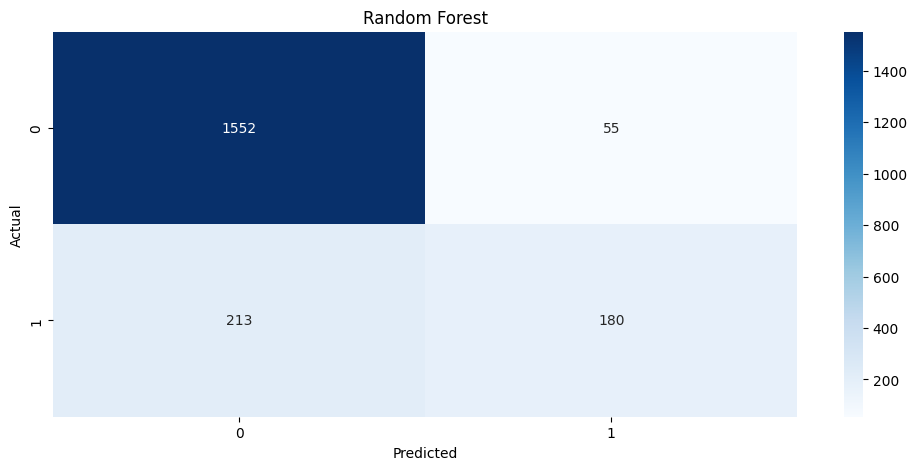

In [ ]:
fig,ax = plt.subplots(1,figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Random Forest')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred3 = gb.predict(X_test)

print("Model3: Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n",classification_report(y_test, y_pred3))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred3))

Model3: Gradient Boosting:
Accuracy: 0.8675
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix:
 [[1543   64]
 [ 201  192]]


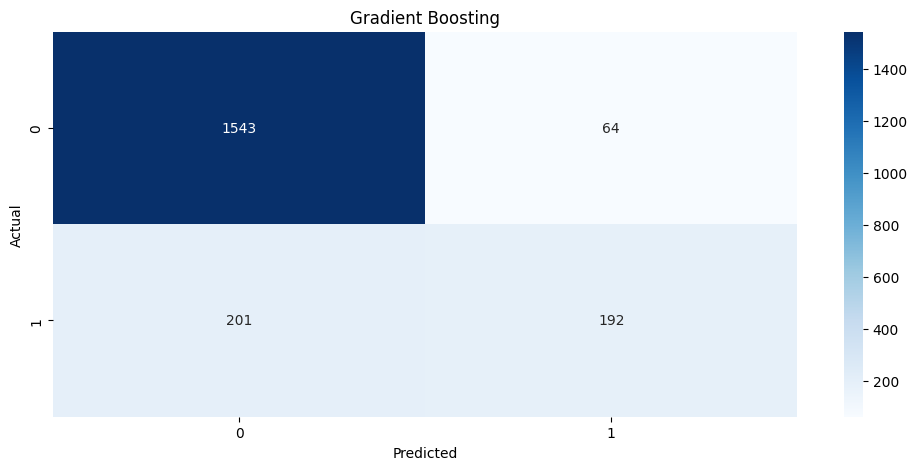

In [ ]:
fig,ax = plt.subplots(1,figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Gradient Boosting')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()